<a href="https://colab.research.google.com/github/Jenet-Shirely/Neural-networks-and-Deep-learning/blob/main/Lab3_NN%26DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop('math score', axis=1)
y = df['math score']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
def build_model(learning_rate=0.01, momentum=0.0):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

In [ ]:
learning_rates = [0.01, 0.05, 0.1]
momentums = [0.0, 0.9]
histories = {}

for lr in learning_rates:
    for m in momentums:
        model = build_model(learning_rate=lr, momentum=m)
        print(f"\nTraining with lr={lr}, momentum={m}")
        history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=0)
        key = f"lr={lr}, m={m}"
        histories[key] = history

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with lr=0.01, momentum=0.0

Training with lr=0.01, momentum=0.9

Training with lr=0.05, momentum=0.0

Training with lr=0.05, momentum=0.9

Training with lr=0.1, momentum=0.0

Training with lr=0.1, momentum=0.9


In [ ]:
epoch_tests = [50, 100, 200]
epoch_results = {}

for ep in epoch_tests:
    model = build_model(learning_rate=0.01, momentum=0.9)
    print(f"\nTraining for {ep} epochs")
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=ep, batch_size=16, verbose=0)
    epoch_results[ep] = history


Training for 50 epochs

Training for 100 epochs

Training for 200 epochs


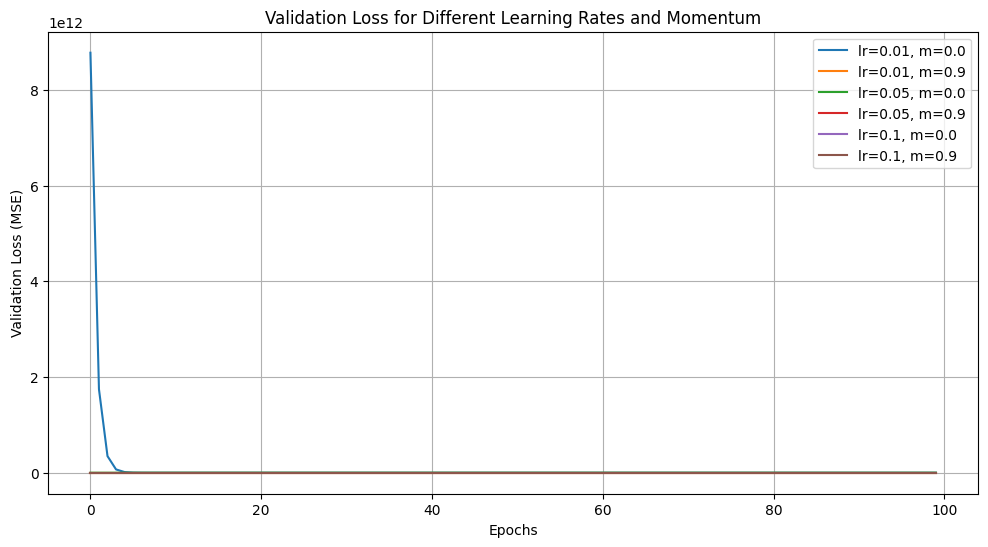

In [ ]:
plt.figure(figsize=(12, 6))
for label, history in histories.items():
    plt.plot(history.history['val_loss'], label=label)

plt.title('Validation Loss for Different Learning Rates and Momentum')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

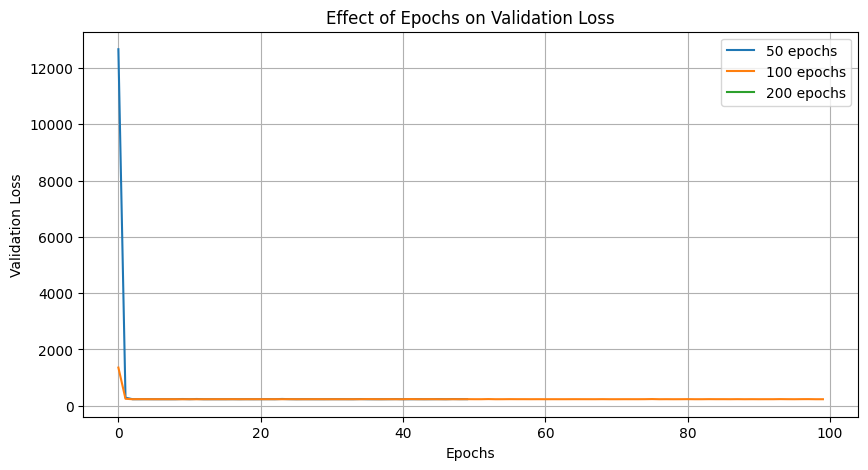

In [ ]:
plt.figure(figsize=(10, 5))
for ep, history in epoch_results.items():
    plt.plot(history.history['val_loss'], label=f"{ep} epochs")

plt.title('Effect of Epochs on Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()